In [769]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [770]:
#Прочитать данные из csv файла
data = pd.read_csv('E:\leaf_dataset\leaf.csv', sep = ',', engine = 'python')

#Заполнить имена столбцов

"""
1. Class (Species)
2. Specimen Number
3. Eccentricity
4. Aspect Ratio
5. Elongation
6. Solidity
7. Stochastic Convexity
8. Isoperimetric Factor
9. Maximal Indentation Depth
10. Lobedness
11. Average Intensity
12. Average Contrast
13. Smoothness
14. Third moment
15. Uniformity
16. Entrop
"""

new_columns = ['Class',
                'Specimen Number',
                'Eccentricity',
                'Aspect Ratio',
                'Elongation',
                'Solidity',
                'Stochastic Convexity',
                'Isoperimetric Factor',
                'Maximal Indentation Depth',
                'Lobedness',
                'Average Intensity',
                'Average Contrast',
                'Smoothness',
                'Third moment',
                'Uniformity',
                'Entropy']

#Переведем в нижний кейс имена столбцов
for i in range(len(new_columns)):
   new_columns[i]=new_columns[i].lower()

data.columns = new_columns
#specimen number нам не нужен(это количество фотографий)
data = data.drop('specimen number',axis=1)
assert(len(data.columns)==15,"size isn't 15")

<ipython-input-770-1401cb15532e>:50: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(data.columns)==15,"size isn't 15")


In [771]:
#Отобразить дааные в виде таблицы
data.head()

class  eccentricity  aspect ratio  elongation  solidity  \
0      1       0.74173        1.5257     0.36116   0.98152   
1      1       0.76722        1.5725     0.38998   0.97755   
2      1       0.73797        1.4597     0.35376   0.97566   
3      1       0.82301        1.7707     0.44462   0.97698   
4      1       0.72997        1.4892     0.34284   0.98755   

   stochastic convexity  isoperimetric factor  maximal indentation depth  \
0               0.99825               0.79867                   0.005242   
1               1.00000               0.80812                   0.007457   
2               1.00000               0.81697                   0.006877   
3               1.00000               0.75493                   0.007428   
4               1.00000               0.84482                   0.004945   

   lobedness  average intensity  average contrast  smoothness  third moment  \
0   0.005002           0.024160          0.090476    0.008119      0.002708   
1   0.010121           0.011897          0.057445    0.003289      0.000921   
2   0.008607           0.015950          0.065491    0.004271      0.001154   
3   0.010042           0.007938          0.045339    0.002051      0.000560   
4   0.004451           0.010487          0.058528    0.003414      0.001125   

   uniformity  entropy  
0    0.000075  0.69659  
1    0.000038  0.44348  
2    0.000066  0.58785  
3    0.000024  0.34214  
4    0.000025  0.34068

In [772]:
#Отобразить информацию по таблице
data.describe()

class  eccentricity  aspect ratio  elongation    solidity  \
count  339.000000    339.000000    339.000000  339.000000  339.000000   
mean    18.595870      0.719833      2.443060    0.514320    0.903918   
std     11.128038      0.208619      2.602353    0.195599    0.114723   
min      1.000000      0.117080      1.006600    0.107610    0.485490   
25%      9.000000      0.550125      1.211100    0.349815    0.890475   
50%     15.000000      0.767220      1.572500    0.502140    0.947830   
75%     29.000000      0.895125      2.343900    0.633445    0.976870   
max     36.000000      0.998710     19.038000    0.948340    0.993880   

       stochastic convexity  isoperimetric factor  maximal indentation depth  \
count            339.000000            339.000000                 339.000000   
mean               0.943627              0.530335                   0.037441   
std                0.115176              0.217220                   0.038591   
min                0.396490              0.078376                   0.002837   
25%                0.965790              0.345725                   0.009694   
50%                0.992980              0.579060                   0.023879   
75%                1.000000              0.698760                   0.047858   
max                1.000000              0.858160                   0.198980   

        lobedness  average intensity  average contrast  smoothness  \
count  339.000000         339.000000        339.000000  339.000000   
mean     0.525379           0.051357          0.124525    0.017675   
std      1.040791           0.036018          0.051936    0.013775   
min      0.001464           0.005022          0.033415    0.001115   
25%      0.017106           0.022801          0.083106    0.006860   
50%      0.103780           0.042051          0.119200    0.014009   
75%      0.416855           0.073051          0.163900    0.026160   
max      7.206200           0.190670          0.280810    0.073089   

       third moment  uniformity     entropy  
count    339.000000  339.000000  339.000000  
mean       0.005930    0.000388    1.162592  
std        0.005302    0.000432    0.585718  
min        0.000229    0.000007    0.169400  
25%        0.002075    0.000102    0.718310  
50%        0.004441    0.000239    1.073400  
75%        0.008348    0.000520    1.557150  
max        0.029786    0.002936    2.708500

In [773]:
X = data.drop('class',axis = 1)
y=data['class']

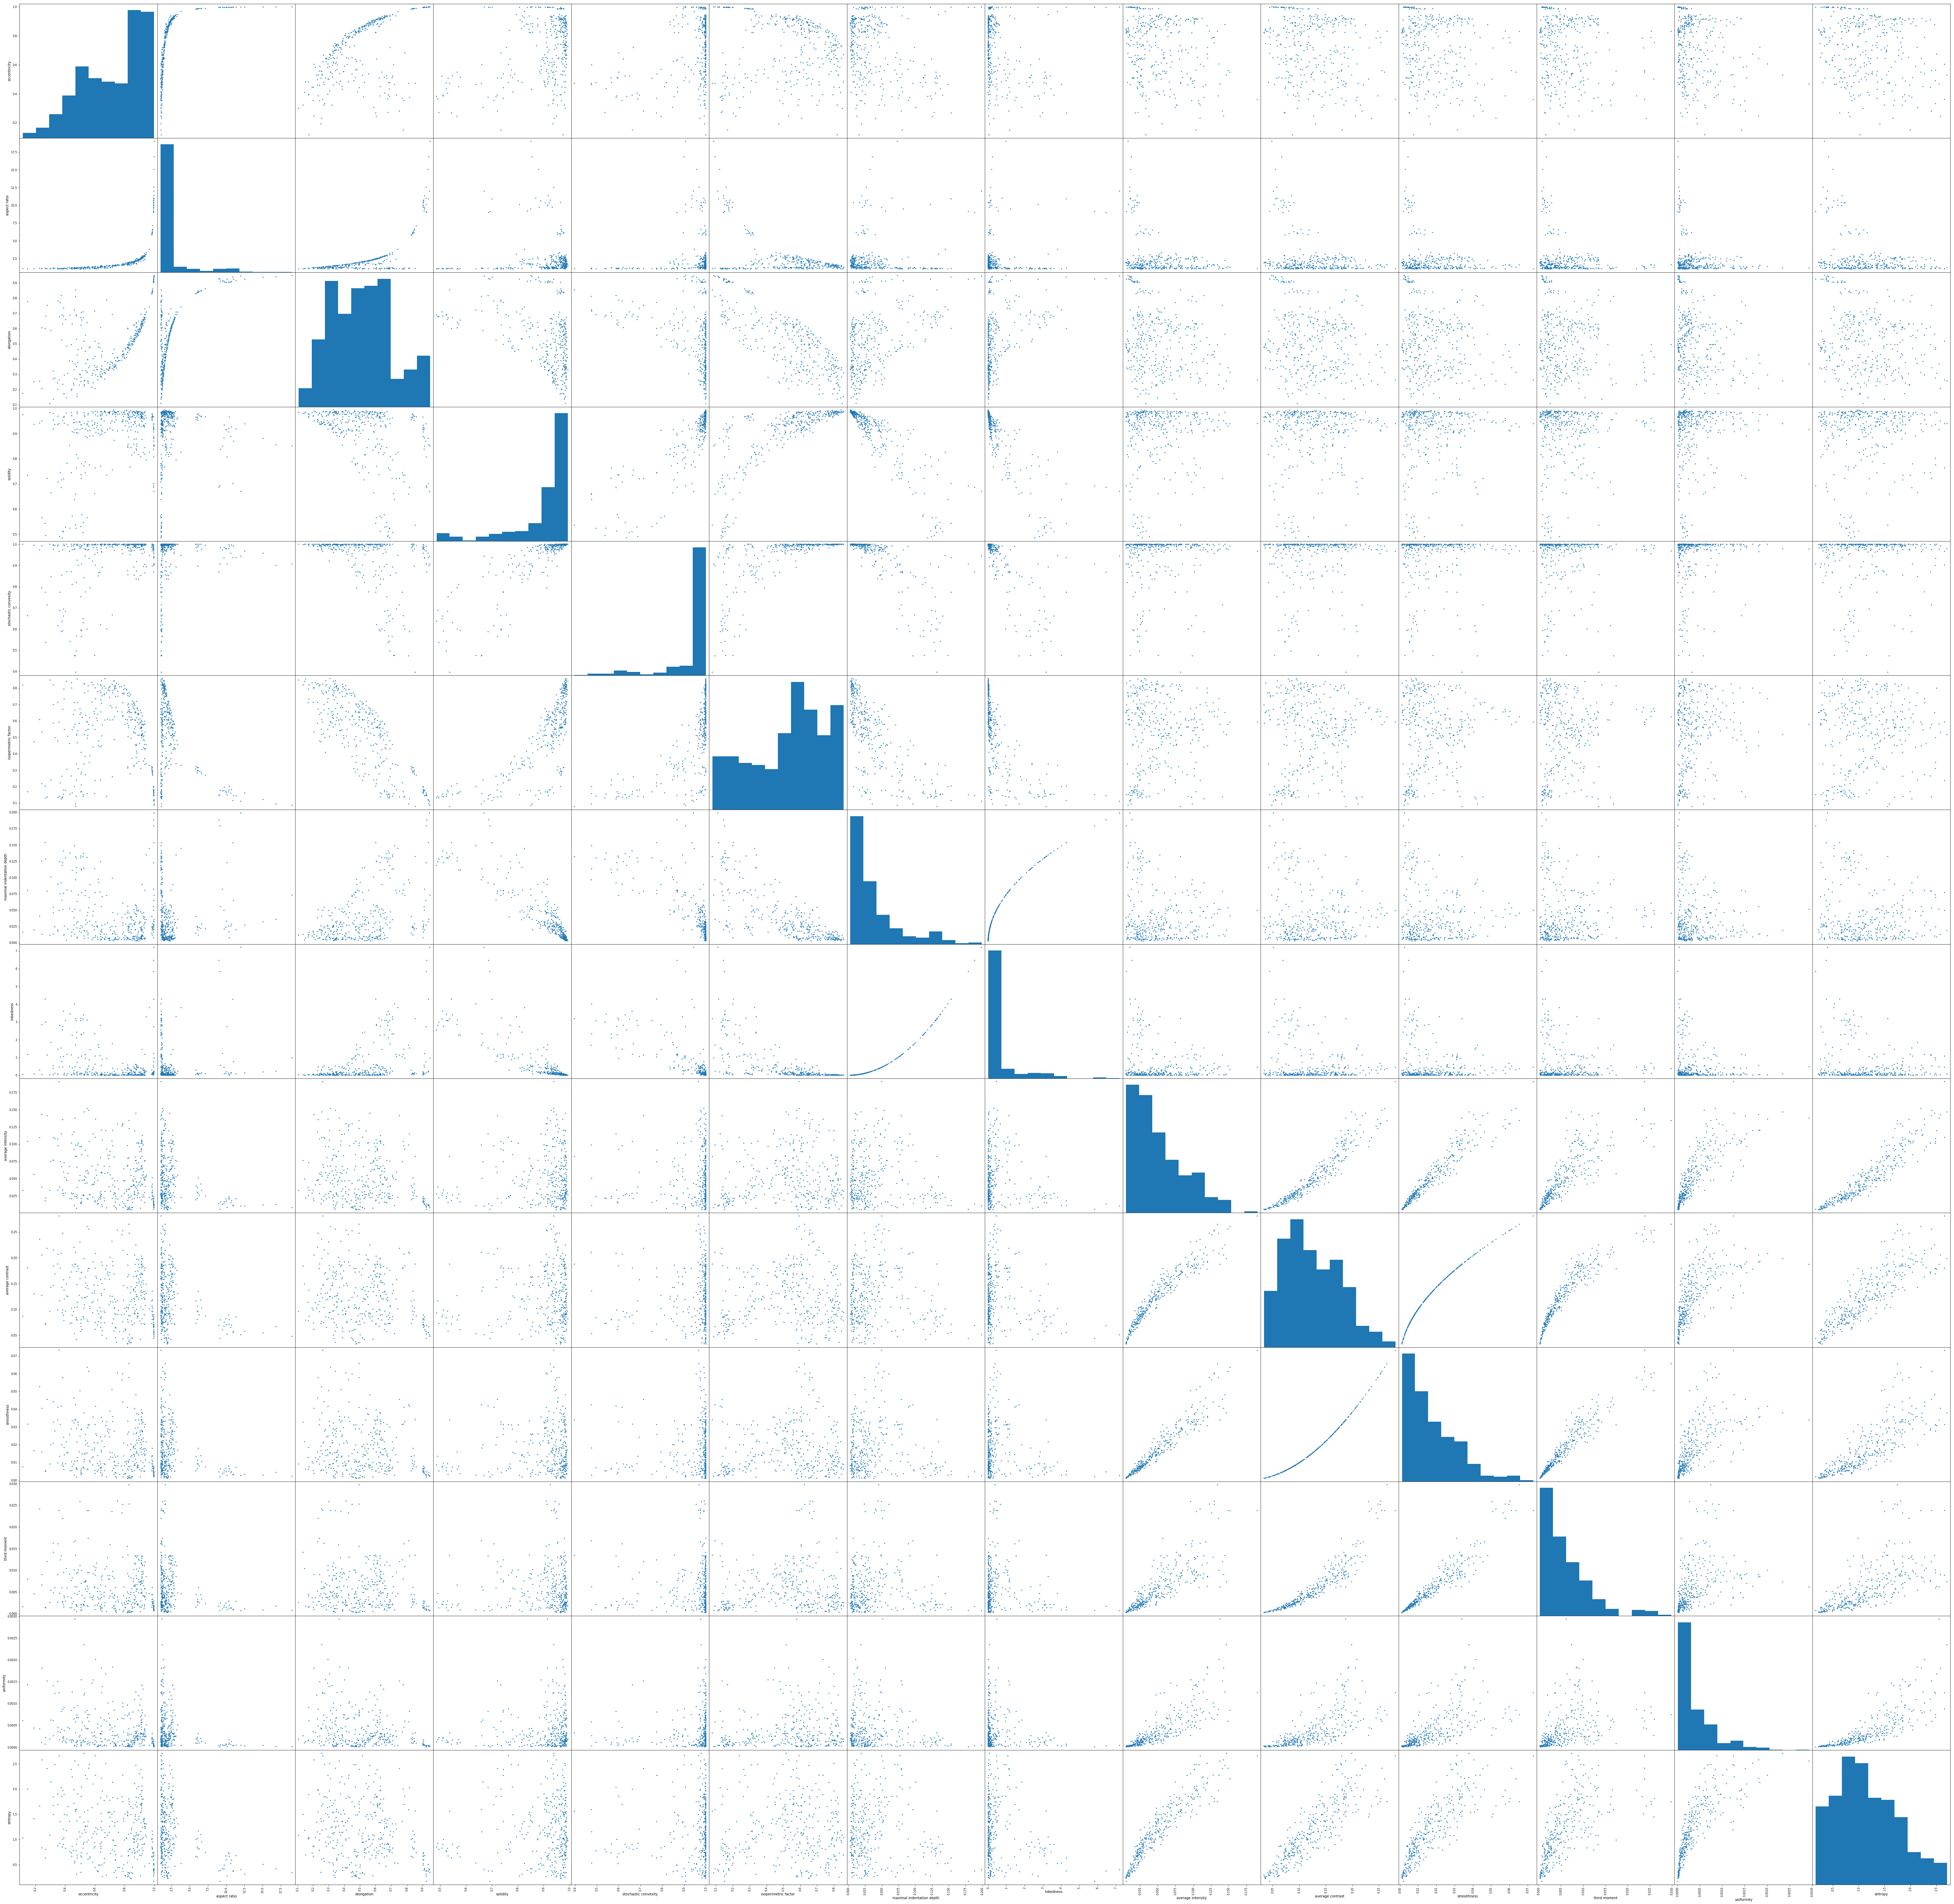

In [774]:
#Отобразим графики корреляций
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha = 1, figsize = (100, 100))
plt.show()
pass

In [775]:
#Матрица корреляций
X.corr()

eccentricity  aspect ratio  elongation  solidity  \
eccentricity                   1.000000      0.551220    0.554433  0.373742   
aspect ratio                   0.551220      1.000000    0.678321  0.005958   
elongation                     0.554433      0.678321    1.000000 -0.410279   
solidity                       0.373742      0.005958   -0.410279  1.000000   
stochastic convexity           0.386420      0.107745   -0.378085  0.862447   
isoperimetric factor          -0.036333     -0.470948   -0.792478  0.755299   
maximal indentation depth     -0.274568      0.091034    0.435708 -0.885544   
lobedness                     -0.213665      0.121967    0.407155 -0.823625   
average intensity             -0.226301     -0.282346   -0.205089  0.085140   
average contrast              -0.194744     -0.297507   -0.188620  0.082620   
smoothness                    -0.191053     -0.263457   -0.179113  0.077862   
third moment                  -0.149546     -0.233966   -0.151687  0.059226   
uniformity                    -0.250344     -0.229719   -0.251806  0.126916   
entropy                       -0.239692     -0.312921   -0.211134  0.055584   

                           stochastic convexity  isoperimetric factor  \
eccentricity                           0.386420             -0.036333   
aspect ratio                           0.107745             -0.470948   
elongation                            -0.378085             -0.792478   
solidity                               0.862447              0.755299   
stochastic convexity                   1.000000              0.656023   
isoperimetric factor                   0.656023              1.000000   
maximal indentation depth             -0.768988             -0.735181   
lobedness                             -0.699413             -0.624133   
average intensity                      0.063325              0.081275   
average contrast                       0.057883              0.078204   
smoothness                             0.050896              0.075288   
third moment                           0.036823              0.067245   
uniformity                             0.107113              0.134629   
entropy                                0.052558              0.069894   

                           maximal indentation depth  lobedness  \
eccentricity                               -0.274568  -0.213665   
aspect ratio                                0.091034   0.121967   
elongation                                  0.435708   0.407155   
solidity                                   -0.885544  -0.823625   
stochastic convexity                       -0.768988  -0.699413   
isoperimetric factor                       -0.735181  -0.624133   
maximal indentation depth                   1.000000   0.946557   
lobedness                                   0.946557   1.000000   
average intensity                          -0.090842  -0.169283   
average contrast                           -0.088633  -0.177786   
smoothness                                 -0.059319  -0.149237   
third moment                               -0.023506  -0.119491   
uniformity                                 -0.138573  -0.169710   
entropy                                    -0.111813  -0.181098   

                           average intensity  average contrast  smoothness  \
eccentricity                       -0.226301         -0.194744   -0.191053   
aspect ratio                       -0.282346         -0.297507   -0.263457   
elongation                         -0.205089         -0.188620   -0.179113   
solidity                            0.085140          0.082620    0.077862   
stochastic convexity                0.063325          0.057883    0.050896   
isoperimetric factor                0.081275          0.078204    0.075288   
maximal indentation depth          -0.090842         -0.088633   -0.059319   
lobedness                          -0.169283         -0.177786   -0.149237   
average intensity                   1

In [776]:
#Отберем данные с самой высокой корреляцией и без повторений
cor_set =[(abs(X.corr().at[X.columns[col1],X.columns[col2]]),X.columns[col1],X.columns[col2]) for col1 in range(len(X.columns)) for col2 in range(col1,len(X.columns)) if col1!=col2]

sort_cor_set = sorted(cor_set,reverse=True)
print(*sort_cor_set,sep='\n')
len(cor_set)

(0.97961096392692837, 'average contrast', 'smoothness')
(0.95539562011327916, 'average intensity', 'smoothness')
(0.95483391056190003, 'average intensity', 'average contrast')
(0.95104184517314494, 'smoothness', 'third moment')
(0.946556747889433, 'maximal indentation depth', 'lobedness')
(0.93572901655257479, 'average intensity', 'entropy')
(0.91796129388575753, 'average contrast', 'third moment')
(0.88554363483027831, 'solidity', 'maximal indentation depth')
(0.86244720565208377, 'solidity', 'stochastic convexity')
(0.8601023194541203, 'average contrast', 'entropy')
(0.82362483894969329, 'solidity', 'lobedness')
(0.82168214971794795, 'average intensity', 'third moment')
(0.82042956728736549, 'smoothness', 'entropy')
(0.80449468017185444, 'average intensity', 'uniformity')
(0.79789809994652761, 'uniformity', 'entropy')
(0.79247805139227467, 'elongation', 'isoperimetric factor')
(0.76898814088440537, 'stochastic convexity', 'maximal indentation depth')
(0.75529940454801814, 'solidity',

91

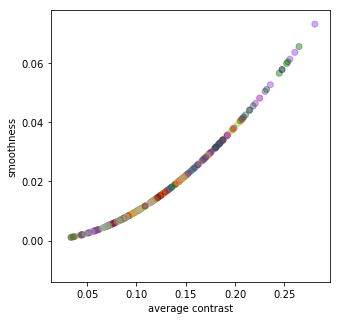

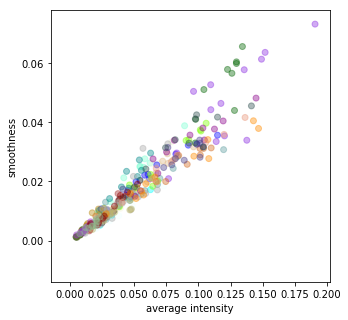

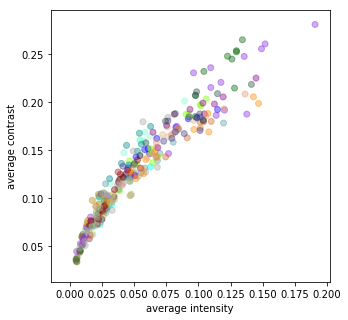

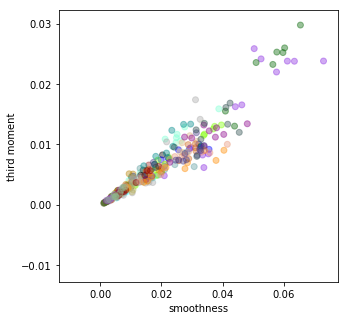

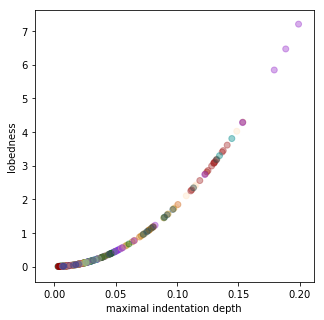

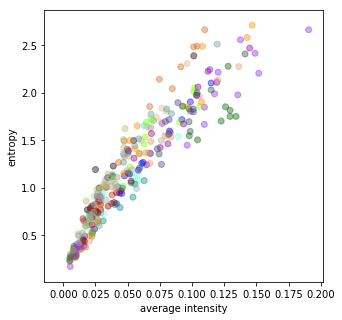

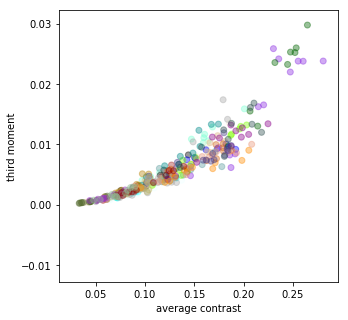

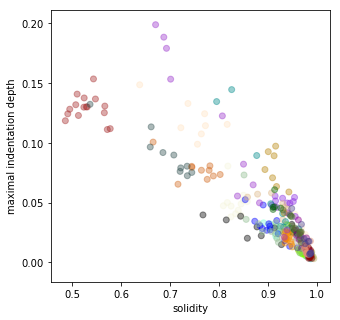

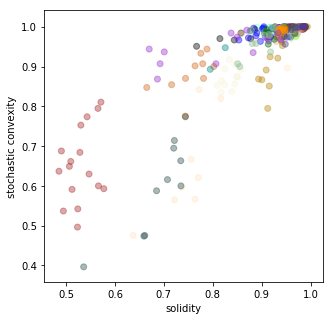

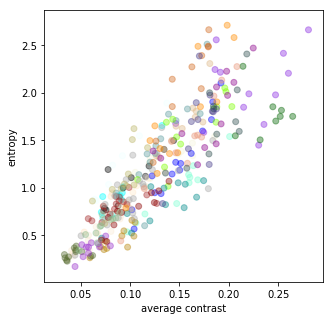

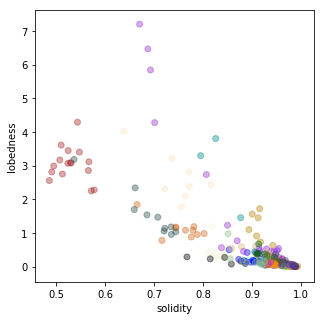

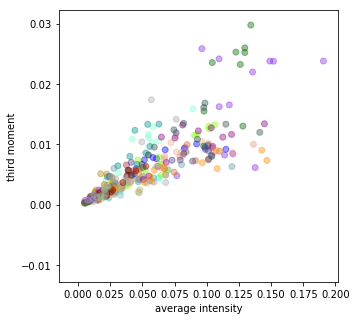

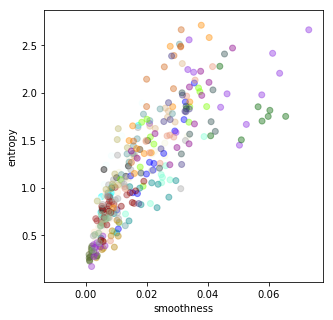

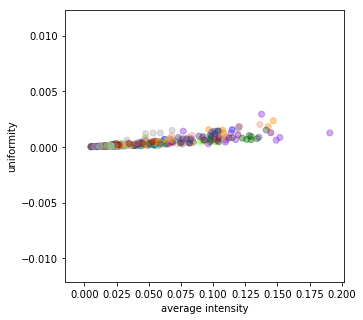

In [777]:
#Отобразим графики с максимальной корреляцией

max_corr_value = 0.8
plt.close('all')
from matplotlib import colors
colors = tuple(colors.CSS4_COLORS.items())
for i,corr_tuple in enumerate(filter(lambda x:x[0]>max_corr_value, sort_cor_set)):
    fig = plt.figure(figsize = (5,5))
    for num in range(y.min(),y.max()+1):
        plt.scatter(data[data['class']==num][corr_tuple[1]],data[data['class']==num][corr_tuple[2]],c=colors[num],alpha = 0.4)
    plt.xlabel(corr_tuple[1])
    plt.ylabel(corr_tuple[2])
plt.show()
    


In [778]:
data.describe(include = ['int64'])

class
count  339.000000
mean    18.595870
std     11.128038
min      1.000000
25%      9.000000
50%     15.000000
75%     29.000000
max     36.000000

In [779]:
data.describe(include = 'all')

class  eccentricity  aspect ratio  elongation    solidity  \
count  339.000000    339.000000    339.000000  339.000000  339.000000   
mean    18.595870      0.719833      2.443060    0.514320    0.903918   
std     11.128038      0.208619      2.602353    0.195599    0.114723   
min      1.000000      0.117080      1.006600    0.107610    0.485490   
25%      9.000000      0.550125      1.211100    0.349815    0.890475   
50%     15.000000      0.767220      1.572500    0.502140    0.947830   
75%     29.000000      0.895125      2.343900    0.633445    0.976870   
max     36.000000      0.998710     19.038000    0.948340    0.993880   

       stochastic convexity  isoperimetric factor  maximal indentation depth  \
count            339.000000            339.000000                 339.000000   
mean               0.943627              0.530335                   0.037441   
std                0.115176              0.217220                   0.038591   
min                0.396490              0.078376                   0.002837   
25%                0.965790              0.345725                   0.009694   
50%                0.992980              0.579060                   0.023879   
75%                1.000000              0.698760                   0.047858   
max                1.000000              0.858160                   0.198980   

        lobedness  average intensity  average contrast  smoothness  \
count  339.000000         339.000000        339.000000  339.000000   
mean     0.525379           0.051357          0.124525    0.017675   
std      1.040791           0.036018          0.051936    0.013775   
min      0.001464           0.005022          0.033415    0.001115   
25%      0.017106           0.022801          0.083106    0.006860   
50%      0.103780           0.042051          0.119200    0.014009   
75%      0.416855           0.073051          0.163900    0.026160   
max      7.206200           0.190670          0.280810    0.073089   

       third moment  uniformity     entropy  
count    339.000000  339.000000  339.000000  
mean       0.005930    0.000388    1.162592  
std        0.005302    0.000432    0.585718  
min        0.000229    0.000007    0.169400  
25%        0.002075    0.000102    0.718310  
50%        0.004441    0.000239    1.073400  
75%        0.008348    0.000520    1.557150  
max        0.029786    0.002936    2.708500

# Предобработаем данные

In [780]:
#Удалим данные с высокой корреляцией, ввиду вывода этих данных(что собственно и означает корреляция)
max_corr_value = 0.93
for corr_tuple in cor_set:
    if corr_tuple[1] in X.columns and corr_tuple[0]>max_corr_value:
        X=X.drop(corr_tuple[1],axis=1)

In [781]:
#Заполним NA что в принципе не обязательно, т.к. все данные присутствуют
X = X.fillna(data.median(axis = 0), axis = 0)

In [782]:
#Отобразить типы в таблице
for col_name in X.columns:
    print(col_name,X[col_name].dtype.name)

eccentricity float64
aspect ratio float64
elongation float64
solidity float64
stochastic convexity float64
isoperimetric factor float64
lobedness float64
third moment float64
uniformity float64
entropy float64


In [783]:
#Введем данные количественные и категориальные
numerical_columns   = [c for c in X.columns if X[c].dtype.name != 'object']

In [784]:
#Выведем кол-во данных
#Выведем кол-во строчек
data[data.columns].count()

class                        339
eccentricity                 339
aspect ratio                 339
elongation                   339
solidity                     339
stochastic convexity         339
isoperimetric factor         339
maximal indentation depth    339
lobedness                    339
average intensity            339
average contrast             339
smoothness                   339
third moment                 339
uniformity                   339
entropy                      339
dtype: int64

In [785]:
#Векторизуем категориальные/номинальые данные, чтобы убрать порядок(в моем случае есть всего лишь 1 столбец с такими данными)
#X_nonbinary=np.array([])
#if("specimen number" in X.columns):
#    X_nonbinary = pd.get_dummies(X['specimen number'])

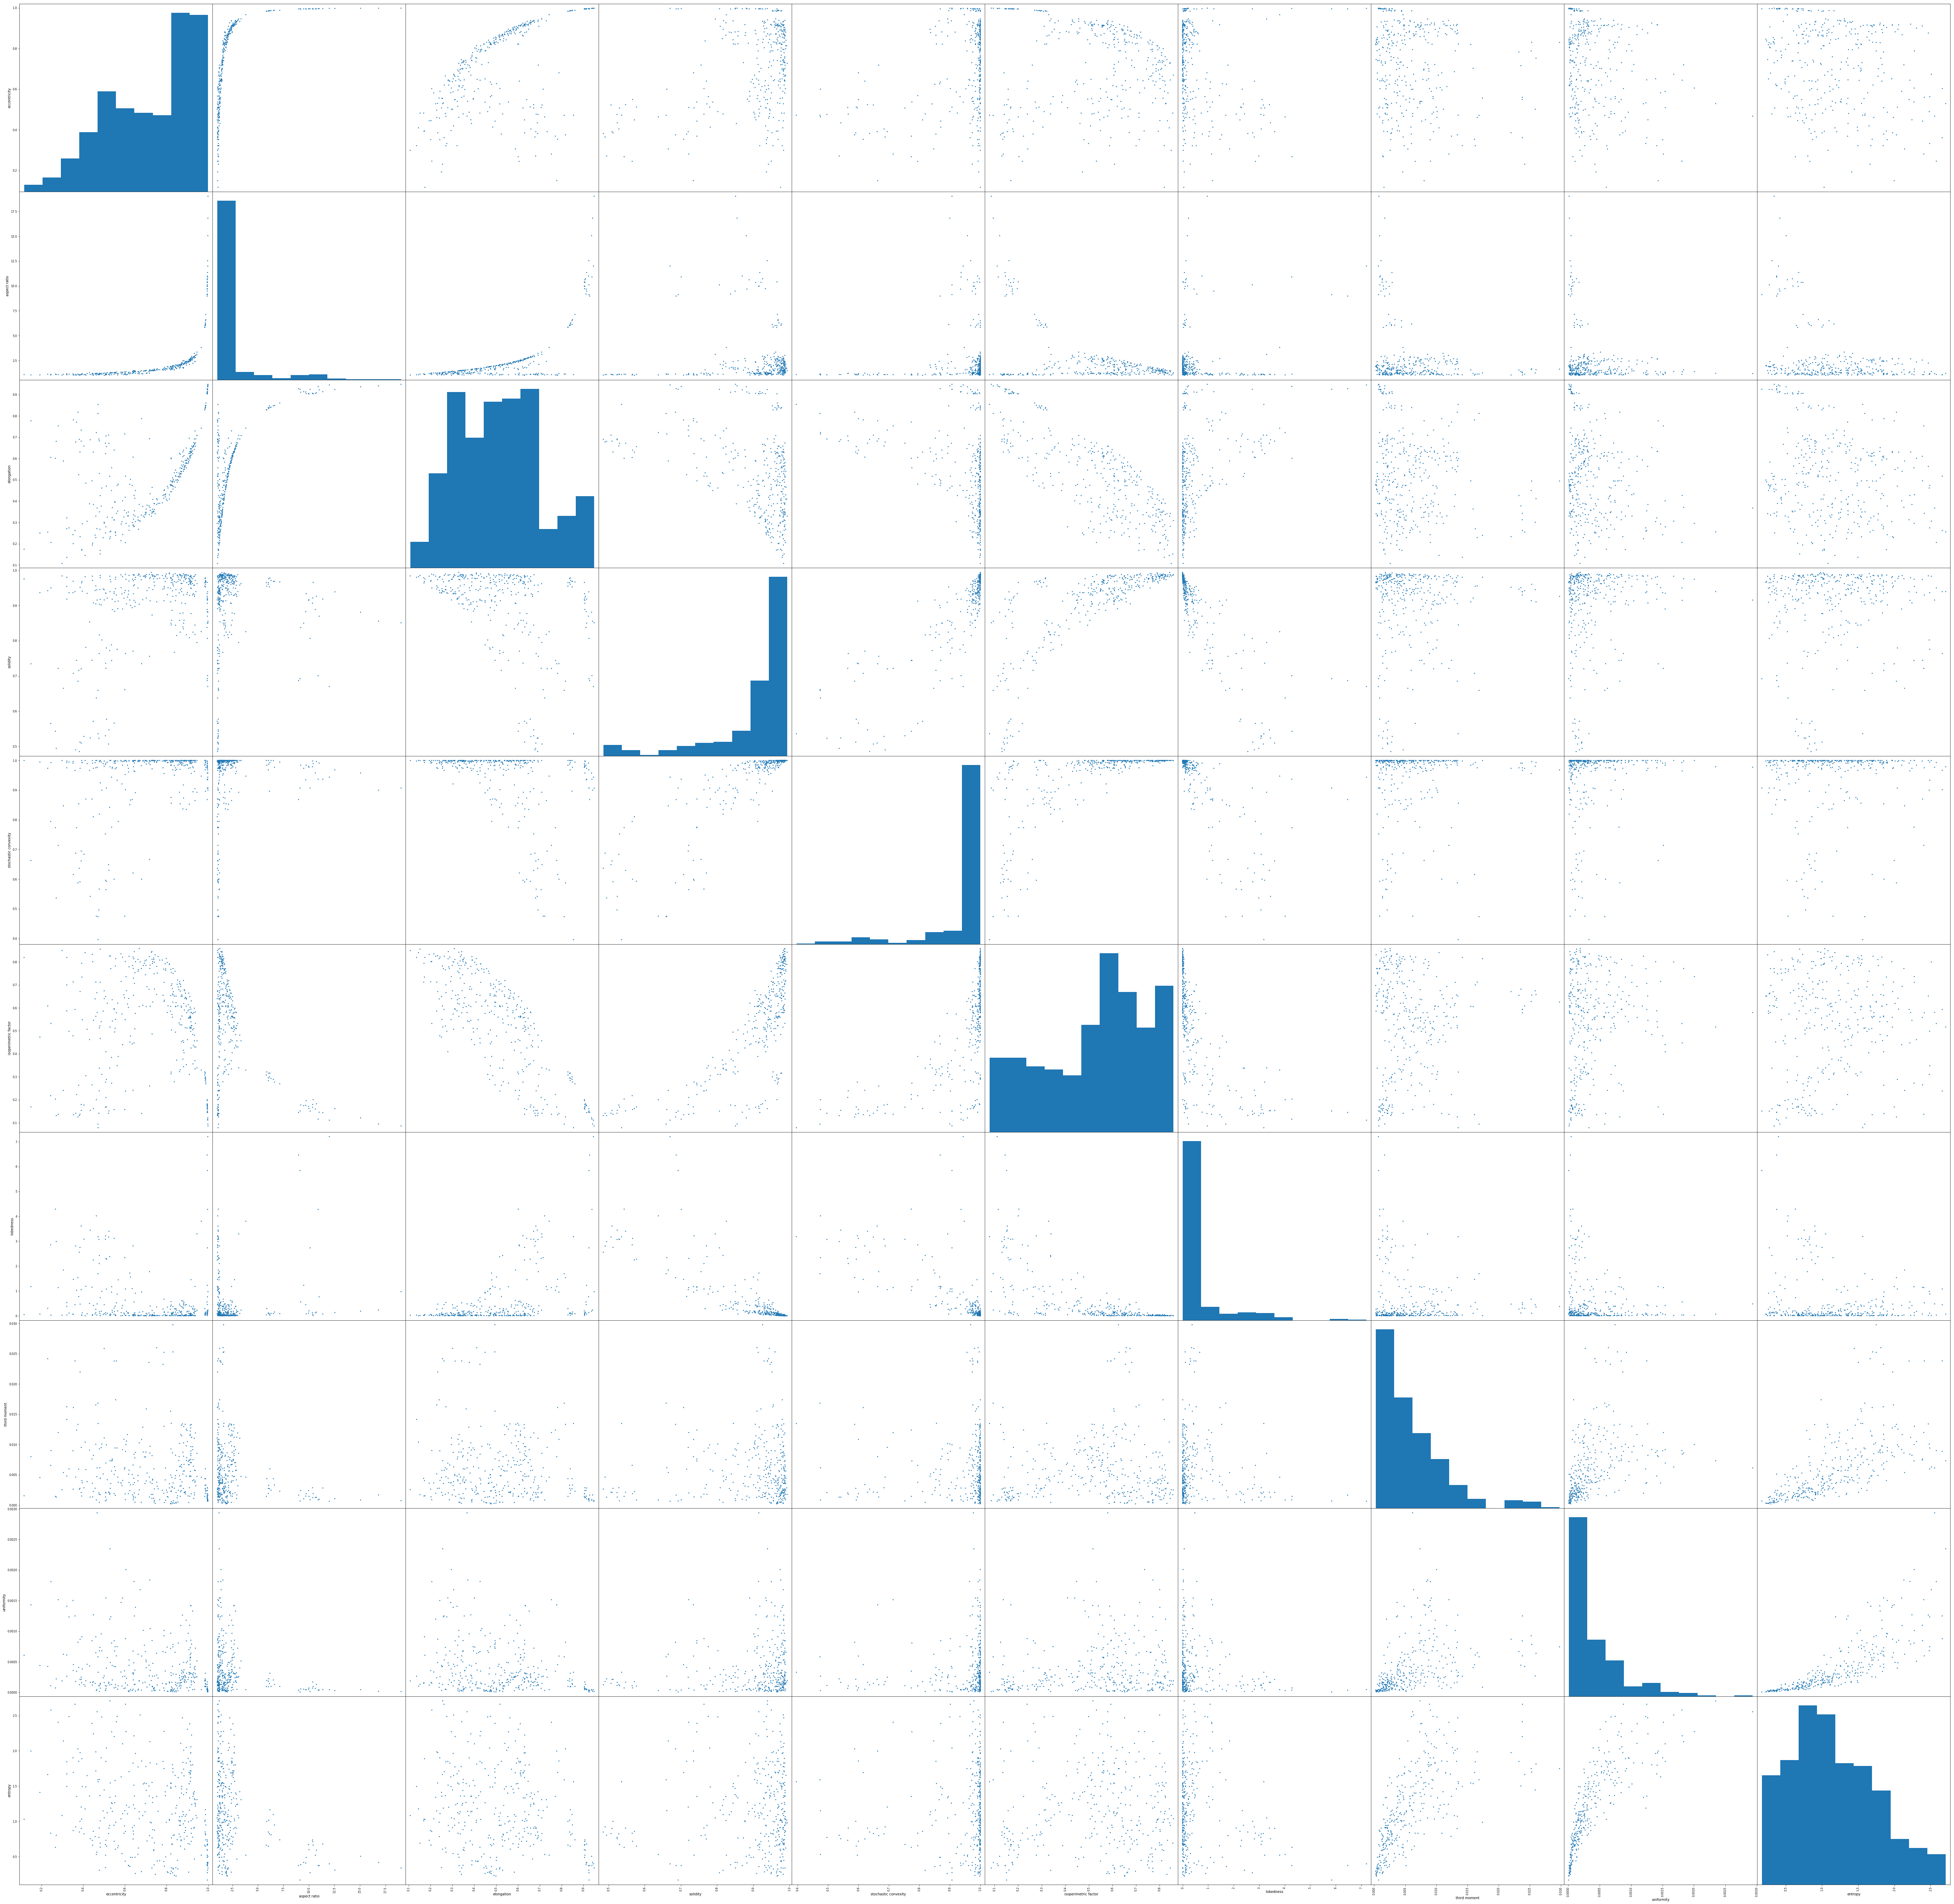

In [786]:
#Посмотрим теперь на графики корреляций
scatter_matrix(X, alpha = 1, figsize = (100, 100))
plt.show()
pass


In [787]:
#Матрица корреляций
X.corr()

eccentricity  aspect ratio  elongation  solidity  \
eccentricity              1.000000      0.551220    0.554433  0.373742   
aspect ratio              0.551220      1.000000    0.678321  0.005958   
elongation                0.554433      0.678321    1.000000 -0.410279   
solidity                  0.373742      0.005958   -0.410279  1.000000   
stochastic convexity      0.386420      0.107745   -0.378085  0.862447   
isoperimetric factor     -0.036333     -0.470948   -0.792478  0.755299   
lobedness                -0.213665      0.121967    0.407155 -0.823625   
third moment             -0.149546     -0.233966   -0.151687  0.059226   
uniformity               -0.250344     -0.229719   -0.251806  0.126916   
entropy                  -0.239692     -0.312921   -0.211134  0.055584   

                      stochastic convexity  isoperimetric factor  lobedness  \
eccentricity                      0.386420             -0.036333  -0.213665   
aspect ratio                      0.107745             -0.470948   0.121967   
elongation                       -0.378085             -0.792478   0.407155   
solidity                          0.862447              0.755299  -0.823625   
stochastic convexity              1.000000              0.656023  -0.699413   
isoperimetric factor              0.656023              1.000000  -0.624133   
lobedness                        -0.699413             -0.624133   1.000000   
third moment                      0.036823              0.067245  -0.119491   
uniformity                        0.107113              0.134629  -0.169710   
entropy                           0.052558              0.069894  -0.181098   

                      third moment  uniformity   entropy  
eccentricity             -0.149546   -0.250344 -0.239692  
aspect ratio             -0.233966   -0.229719 -0.312921  
elongation               -0.151687   -0.251806 -0.211134  
solidity                  0.059226    0.126916  0.055584  
stochastic convexity      0.036823    0.107113  0.052558  
isoperimetric factor      0.067245    0.134629  0.069894  
lobedness                -0.119491   -0.169710 -0.181098  
third moment              1.000000    0.409224  0.645004  
uniformity                0.409224    1.000000  0.797898  
entropy                   0.645004    0.797898  1.000000

In [788]:
#Нормализуем признаки
X_numerical = data[numerical_columns]
X_numerical.describe()


eccentricity  aspect ratio  elongation    solidity  \
count    339.000000    339.000000  339.000000  339.000000   
mean       0.719833      2.443060    0.514320    0.903918   
std        0.208619      2.602353    0.195599    0.114723   
min        0.117080      1.006600    0.107610    0.485490   
25%        0.550125      1.211100    0.349815    0.890475   
50%        0.767220      1.572500    0.502140    0.947830   
75%        0.895125      2.343900    0.633445    0.976870   
max        0.998710     19.038000    0.948340    0.993880   

       stochastic convexity  isoperimetric factor   lobedness  third moment  \
count            339.000000            339.000000  339.000000    339.000000   
mean               0.943627              0.530335    0.525379      0.005930   
std                0.115176              0.217220    1.040791      0.005302   
min                0.396490              0.078376    0.001464      0.000229   
25%                0.965790              0.345725    0.017106      0.002075   
50%                0.992980              0.579060    0.103780      0.004441   
75%                1.000000              0.698760    0.416855      0.008348   
max                1.000000              0.858160    7.206200      0.029786   

       uniformity     entropy  
count  339.000000  339.000000  
mean     0.000388    1.162592  
std      0.000432    0.585718  
min      0.000007    0.169400  
25%      0.000102    0.718310  
50%      0.000239    1.073400  
75%      0.000520    1.557150  
max      0.002936    2.708500

In [789]:
#Все еще их нормализуем
X_numerical = (X_numerical - X_numerical.mean(axis = 0))/X_numerical.std(axis = 0)
X_numerical.describe()

eccentricity  aspect ratio    elongation      solidity  \
count  3.390000e+02  3.390000e+02  3.390000e+02  3.390000e+02   
mean  -8.252985e-17 -1.273973e-16  1.557587e-15  1.971546e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.889259e+00 -5.519850e-01 -2.079307e+00 -3.647279e+00   
25%   -8.134857e-01 -4.734023e-01 -8.410334e-01 -1.171795e-01   
50%    2.271452e-01 -3.345279e-01 -6.227176e-02  3.827622e-01   
75%    8.402497e-01 -3.810382e-02  6.090251e-01  6.358928e-01   
max    1.336778e+00  6.376899e+00  2.218926e+00  7.841625e-01   

       stochastic convexity  isoperimetric factor     lobedness  third moment  \
count          3.390000e+02          3.390000e+02  3.390000e+02  3.390000e+02   
mean           4.123873e-15          2.174596e-16  2.724795e-16  4.886291e-16   
std            1.000000e+00          1.000000e+00  1.000000e+00  1.000000e+00   
min           -4.750448e+00         -2.080650e+00 -5.033809e-01 -1.075170e+00   
25%            1.924259e-01         -8.498748e-01 -4.883527e-01 -7.271324e-01   
50%            4.284996e-01          2.243128e-01 -4.050752e-01 -2.808604e-01   
75%            4.894498e-01          7.753671e-01 -1.042703e-01  4.561990e-01   
max            4.894498e-01          1.509185e+00  6.418985e+00  4.499637e+00   

         uniformity       entropy  
count  3.390000e+02  3.390000e+02  
mean   5.619890e-16 -1.109896e-15  
std    1.000000e+00  1.000000e+00  
min   -8.810192e-01 -1.695683e+00  
25%   -6.609420e-01 -7.585250e-01  
50%   -3.446593e-01 -1.522775e-01  
75%    3.065041e-01  6.736322e-01  
max    5.898246e+00  2.639340e+00

In [790]:
#Удалим самые неважные признаки
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_numerical,y)
min_important_value = 0.08
no_important_data = list(filter(lambda x:x[0]<min_important_value,zip(forest.feature_importances_,X_numerical.columns)))
print(no_important_data)
no_important_data = map(lambda x: x[1],no_important_data)
#print(list(no_important_data))
#X_numerical = X_numerical.drop('lobedness',axis=1)
for name in no_important_data:
    print(name)
    X_numerical = X_numerical.drop(name,axis=1)


[(0.065270827633884254, 'stochastic convexity')]
stochastic convexity


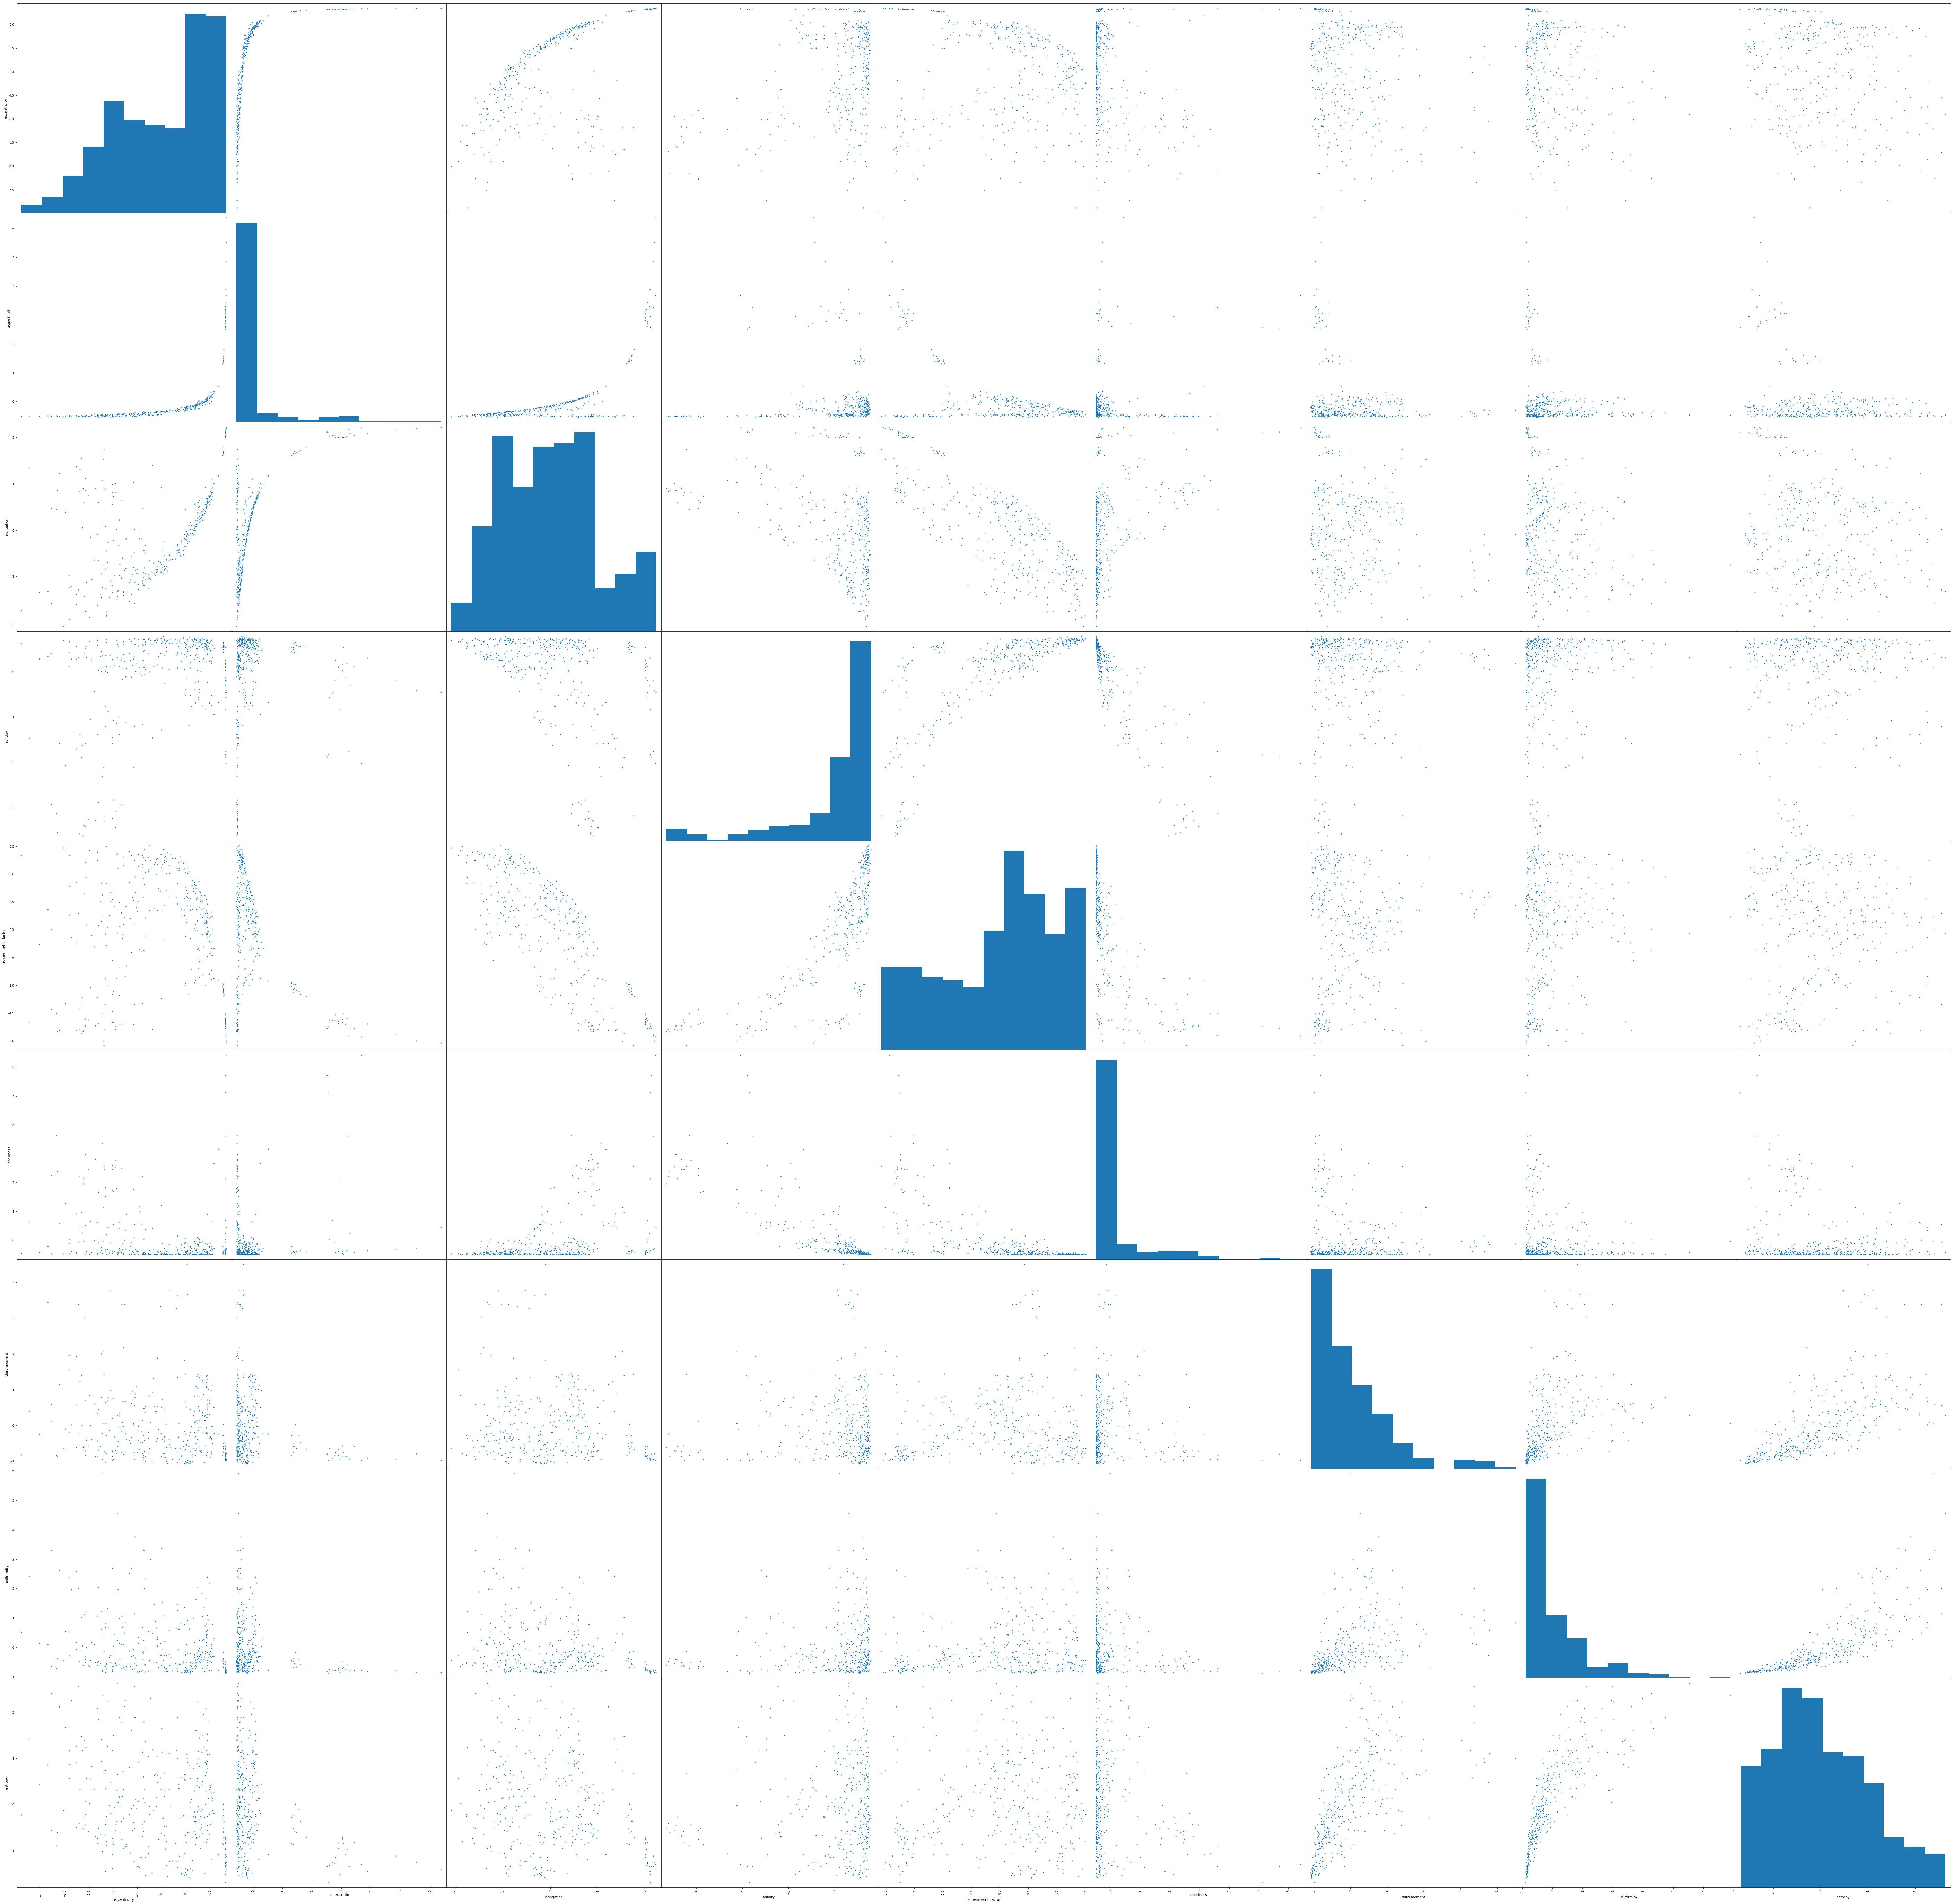

Index(['eccentricity', 'aspect ratio', 'elongation', 'solidity',
       'isoperimetric factor', 'lobedness', 'third moment', 'uniformity',
       'entropy'],
      dtype='object')


In [791]:
#Посмотрим теперь на графики корреляций
scatter_matrix(X_numerical, alpha = 1, figsize = (100, 100))
plt.show()
pass
print(X_numerical.columns)

In [792]:
#Соединим таблицы, но т.к. у нас всего одна числовая таблица она и будет использоваться
#X = pd.concat((X_numerical, X_nonbinary), axis = 1)
X = X_numerical

In [793]:
#Разделим данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# KNN

In [794]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [795]:
#Мне больше нравится высчитывать верность, нежели ошибку
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

score_train = knn.score(X_train, y_train)
score_test =  knn.score(X_test, y_test)

print(score_train, score_test)

0.637130801688 0.558823529412


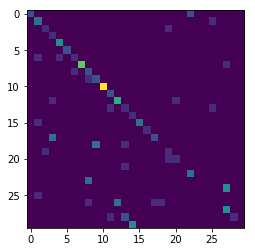

In [796]:
from sklearn.metrics import confusion_matrix

#print(confusion_matrix(y_test, y_test_predict))
plt.imshow(confusion_matrix(y_test, y_test_predict))
plt.show()

In [797]:
from sklearn.model_selection import GridSearchCV
nnb = range(1,15)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=2)
grid.fit(X_train, y_train)

best_cv_score = grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_score, best_n_neighbors)

0.582278481013 1


In [798]:
#Т.к. наш набор очень мал, мы используем метод К-перекрестных проверок чтобы высчитать среднюю верность
from sklearn.model_selection import KFold
n = y.count()
kf = KFold(n_splits=n)
score=0
#print(X.at[:][[1,2]])
#print(list(kf.split(X)))
for train, test in kf.split(X):
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X.loc[train],y[train])
    score+=knn.score(X.loc[test],y[test])/n
print(score)


0.713864306785


In [799]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')